# Regresión Logística

### Antes de empezar, ejecutemos las librerías necesarias

In [105]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import sidetable

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
plt.rcParams["figure.figsize"] = (10,8)

#Gestión Outliers
# ==============================================================================
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

#Estandarización
# ==============================================================================
from sklearn.preprocessing import StandardScaler

#Encoding
# ==============================================================================
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

#Ajuste modelo
# ==============================================================================
from sklearn.model_selection import train_test_split

#Balanceo Modelo 
# ==============================================================================
from imblearn.over_sampling import RandomOverSampler

#Matriz de Confusión
# ==============================================================================
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Para calcular las métricas
# ==============================================================================
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score 
from sklearn.metrics import cohen_kappa_score

#Modelo Regresión Logística/ Árbol/ Bosques / KNN Classifier
# ==============================================================================
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from sklearn import tree

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import GradientBoostingClassifier

### Abramos nuestro CSV y definamos nuestras columnas

In [2]:
col = ["Customer_Number","Offer_Accepted","Reward","Mailer_Type","Income_Level","Bank_Accounts_Open","Overdraft_Protection","Credit_Rating","Credit_Cards_Held","Homes_Owned","Household_Size","Own_Your_Home","Average_Balance_Q1","Average_Balance_Q2","Average_Balance_Q3","Average_Balance_Q4","Balance"]

In [3]:
df = pd.read_csv("datos/creditcardmarketing.csv", header= None)
df.head()

0   1          2         3       4   5   6       7   8   9   10   11  \
0   1  No  Air Miles    Letter    High   1  No    High   2   1   4   No   
1   2  No  Air Miles    Letter  Medium   1  No  Medium   2   2   5  Yes   
2   3  No  Air Miles  Postcard    High   2  No  Medium   2   1   2  Yes   
3   4  No  Air Miles    Letter  Medium   2  No    High   1   1   4   No   
4   5  No  Air Miles    Letter  Medium   1  No  Medium   2   1   6  Yes   

        12      13      14      15      16  
0  1160.75  1669.0   877.0  1095.0  1002.0  
1   147.25    39.0   106.0    78.0   366.0  
2   276.50   367.0   352.0   145.0   242.0  
3  1219.00  1578.0  1760.0  1119.0   419.0  
4  1211.00  2140.0  1357.0   982.0   365.0

In [4]:
df.columns = col

In [5]:
df.head()

Customer_Number Offer_Accepted     Reward Mailer_Type Income_Level  \
0                1             No  Air Miles      Letter         High   
1                2             No  Air Miles      Letter       Medium   
2                3             No  Air Miles    Postcard         High   
3                4             No  Air Miles      Letter       Medium   
4                5             No  Air Miles      Letter       Medium   

   Bank_Accounts_Open Overdraft_Protection Credit_Rating  Credit_Cards_Held  \
0                   1                   No          High                  2   
1                   1                   No        Medium                  2   
2                   2                   No        Medium                  2   
3                   2                   No          High                  1   
4                   1                   No        Medium                  2   

   Homes_Owned  Household_Size Own_Your_Home  Average_Balance_Q1  \
0            1               4            No             1160.75   
1            2               5           Yes              147.25   
2            1               2           Yes              276.50   
3            1               4            No             1219.00   
4            1               6           Yes             1211.00   

   Average_Balance_Q2  Average_Balance_Q3  Average_Balance_Q4  Balance  
0              1669.0               877.0              1095.0   1002.0  
1                39.0               106.0                78.0    366.0  
2               367.0               352.0               145.0    242.0  
3              1578.0              1760.0              1119.0    419.0  
4              2140.0              1357.0               982.0    365.0

### Análisis Exploratorio, EDA

In [6]:
#Tipos de datos de nuestro dataset
# ==============================================================================
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_Number       18000 non-null  int64  
 1   Offer_Accepted        18000 non-null  object 
 2   Reward                18000 non-null  object 
 3   Mailer_Type           18000 non-null  object 
 4   Income_Level          18000 non-null  object 
 5   Bank_Accounts_Open    18000 non-null  int64  
 6   Overdraft_Protection  18000 non-null  object 
 7   Credit_Rating         18000 non-null  object 
 8   Credit_Cards_Held     18000 non-null  int64  
 9   Homes_Owned           18000 non-null  int64  
 10  Household_Size        18000 non-null  int64  
 11  Own_Your_Home         18000 non-null  object 
 12  Average_Balance_Q1    17976 non-null  float64
 13  Average_Balance_Q2    17976 non-null  float64
 14  Average_Balance_Q3    17976 non-null  float64
 15  Average_Balance_Q4 

In [7]:
#Nulos

df.isnull().sum()

Customer_Number          0
Offer_Accepted           0
Reward                   0
Mailer_Type              0
Income_Level             0
Bank_Accounts_Open       0
Overdraft_Protection     0
Credit_Rating            0
Credit_Cards_Held        0
Homes_Owned              0
Household_Size           0
Own_Your_Home            0
Average_Balance_Q1      24
Average_Balance_Q2      24
Average_Balance_Q3      24
Average_Balance_Q4      24
Balance                 24
dtype: int64

In [8]:
#Valores Duplicados

df.duplicated().sum()

0

In [9]:
#Distribución de nuestros datos

df.describe().T

count         mean          std    min      25%     50%  \
Customer_Number     18000.0  9000.500000  5196.296758   1.00  4500.75  9000.5   
Bank_Accounts_Open  18000.0     1.255778     0.472501   1.00     1.00     1.0   
Credit_Cards_Held   18000.0     1.903500     0.797009   1.00     1.00     2.0   
Homes_Owned         18000.0     1.203444     0.427341   1.00     1.00     1.0   
Household_Size      18000.0     3.499056     1.114182   1.00     3.00     3.0   
Average_Balance_Q1  17976.0   940.515562   350.297837  48.25   787.50  1007.0   
Average_Balance_Q2  17976.0   910.450656   620.077060   0.00   392.75   772.0   
Average_Balance_Q3  17976.0   999.392190   457.402268   0.00   663.00  1032.0   
Average_Balance_Q4  17976.0  1042.033600   553.452599   0.00   633.00   945.5   
Balance             17976.0   810.185803   559.001365   0.00   363.00   703.0   

                         75%       max  
Customer_Number     13500.25  18000.00  
Bank_Accounts_Open      1.00      3.00  
Credit_Cards_Held       2.00      4.00  
Homes_Owned             1.00      3.00  
Household_Size          4.00      9.00  
Average_Balance_Q1   1153.25   3366.25  
Average_Balance_Q2   1521.00   3450.00  
Average_Balance_Q3   1342.00   3421.00  
Average_Balance_Q4   1463.00   3823.00  
Balance              1212.00   4215.00

In [10]:
df["Offer_Accepted"] = df["Offer_Accepted"].astype("category")

In [11]:
# exploramos variables categóricas
# ==============================================================================
df.describe(include  = ["object", "category"]).T

count unique        top   freq
Offer_Accepted        18000      2         No  16977
Reward                18000      3  Air Miles   6061
Mailer_Type           18000      2   Postcard   9147
Income_Level          18000      3     Medium   9013
Overdraft_Protection  18000      2         No  15322
Credit_Rating         18000      3       High   6071
Own_Your_Home         18000      2        Yes  11655

### Análisis Exploratorio Visual 

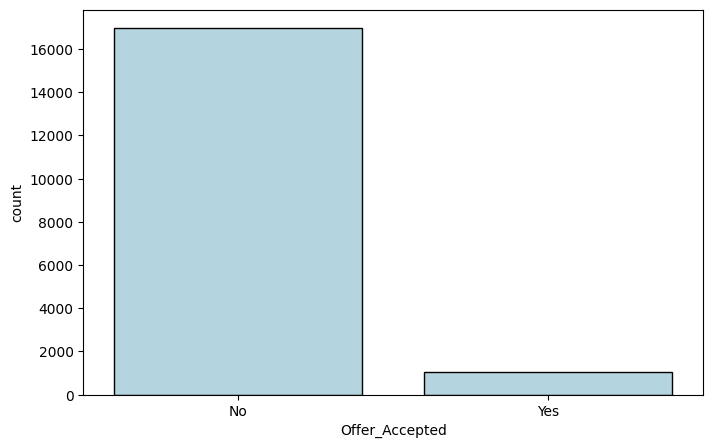

In [12]:
# Variable Respuesta
# ==============================================================================
plt.figure(figsize=(8,5))

fig1 = sns.countplot(data = df, x = "Offer_Accepted",  color = "lightblue",  edgecolor='black'); 
fig1.set(xticklabels=["No", "Yes"]) 
plt.show();

In [13]:
df["Offer_Accepted"].value_counts() / df.shape[0]

No     0.943167
Yes    0.056833
Name: Offer_Accepted, dtype: float64

💰 Un 94% de las persones no aceptaron la creación de la tarjeta de crédito frente a un 5,6% que si. 

### Variables catégoricas 

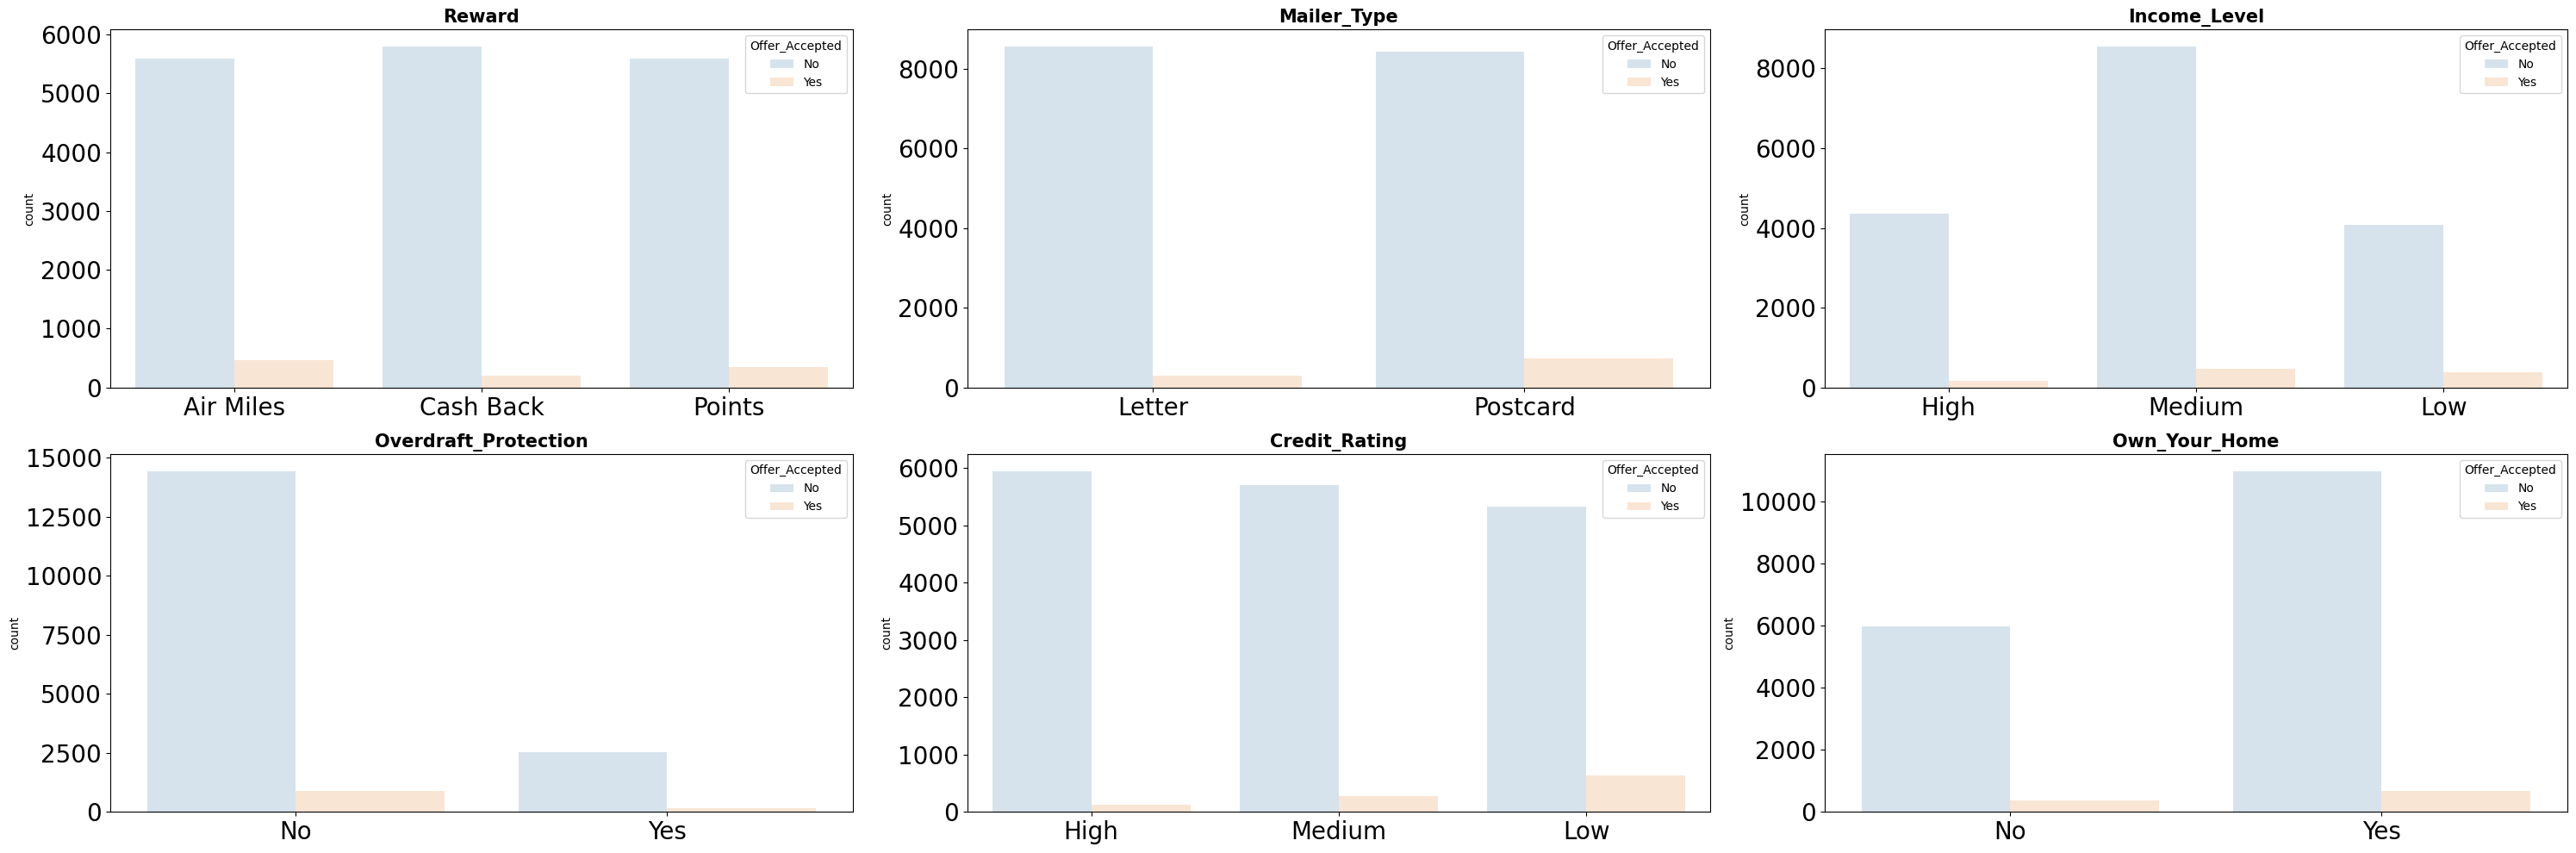

In [14]:
# Gráfico de distribución para cada variable categórica
# ==============================================================================

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 10))


axes = axes.flat

columnas_cat = df.select_dtypes(include = "object").columns

for i, colum in enumerate(columnas_cat): 
    sns.countplot(
        data = df,
        x = colum,
        hue = "Offer_Accepted",
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.tight_layout();

Las conclusiones reseñables que podemos sacar después de analizar nuestras variables categóricas, basándonos en que una mayoría de clientes han denegado el producto, son las siguientes:

- Los clientes que aceptaron la propuesta eran los que tenían un rating más bajo y nivel de ingresos medio/bajo.  
- A su vez estos clientes han denegado el seguro frente a descubiertos en cuenta. 
- La mayoría son propietarios de su vivienda. 

### Variables Numéricas

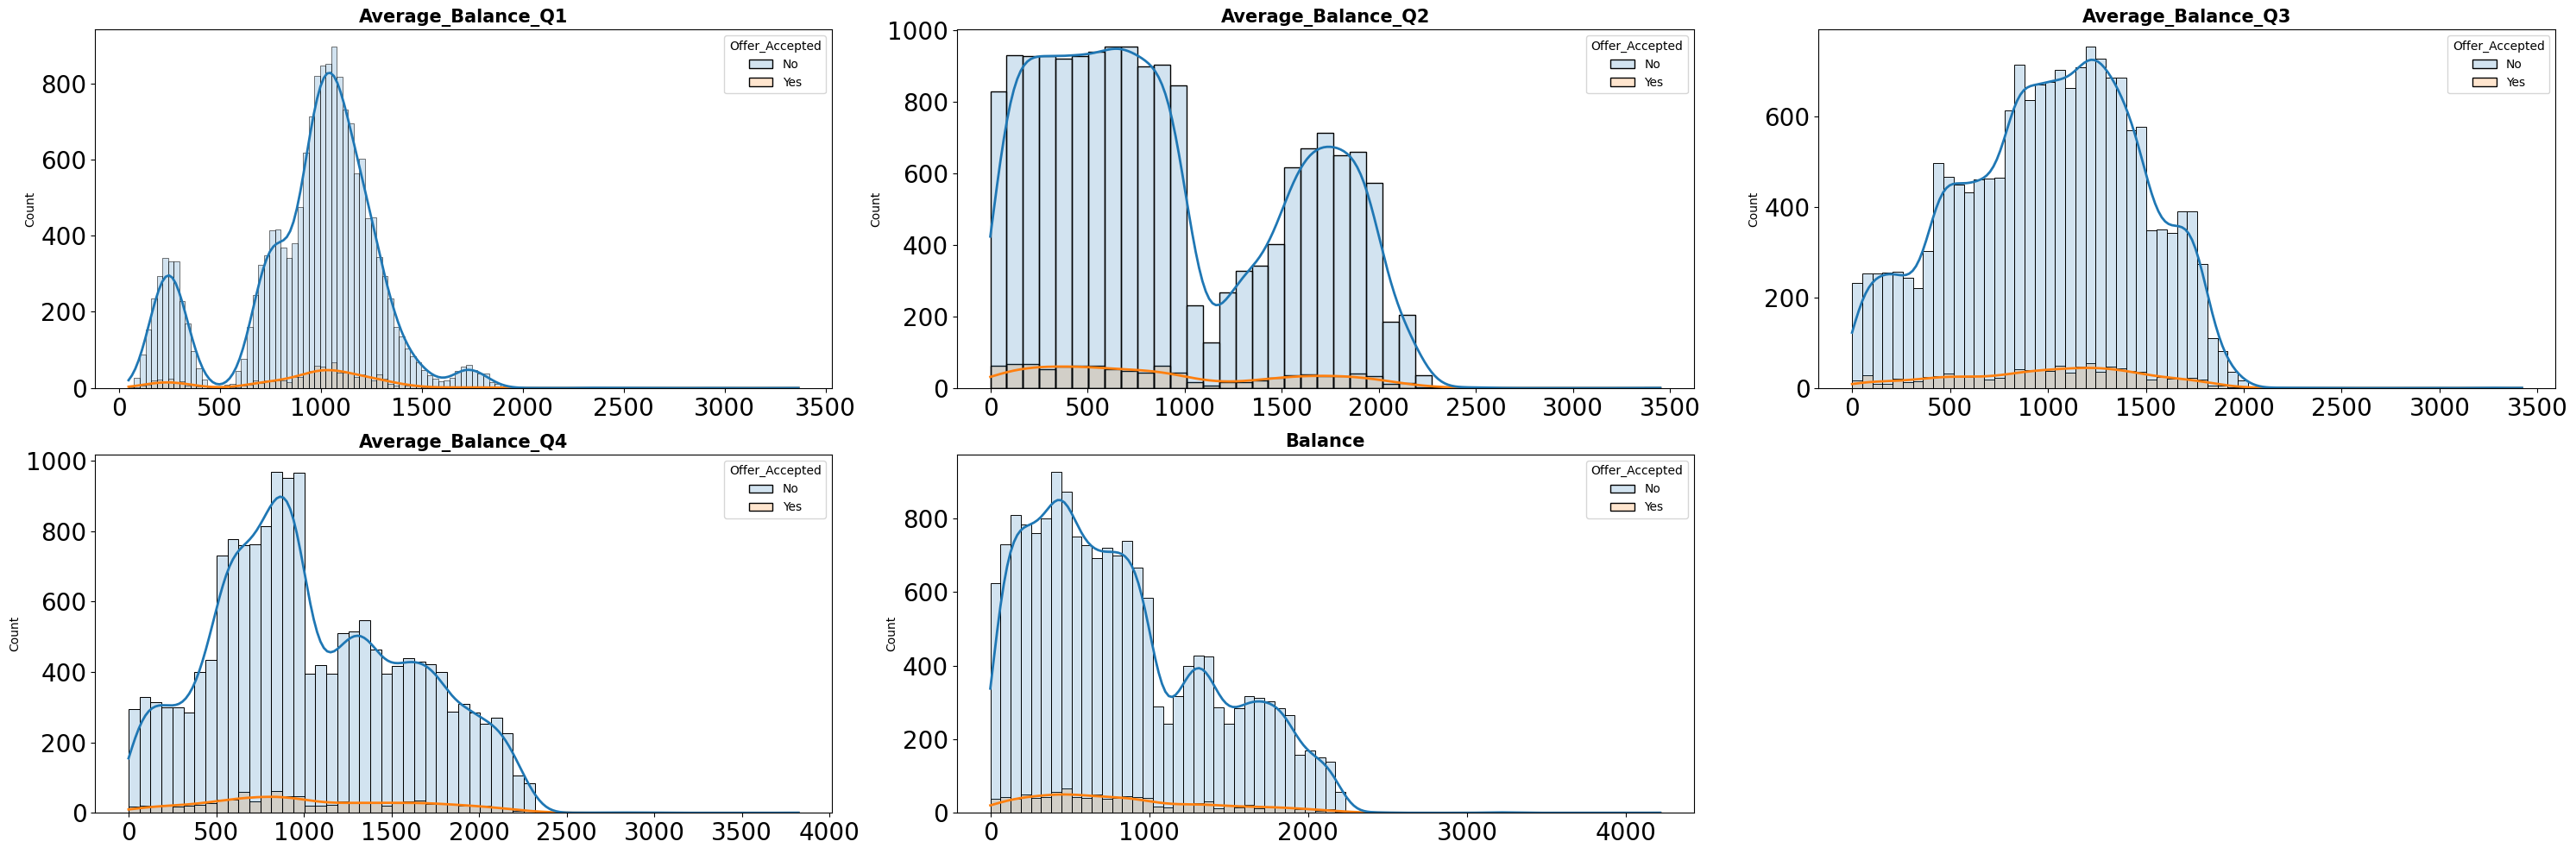

In [15]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 10))

axes = axes.flat

columnas_numeric = df.drop(["Customer_Number","Bank_Accounts_Open","Credit_Cards_Held","Homes_Owned","Household_Size"], axis=1).select_dtypes(include = np.number)

for i, colum in enumerate(columnas_numeric.columns):
    sns.histplot(
        data = columnas_numeric,
        hue = df["Offer_Accepted"],
        x = colum,
        kde = True,
        line_kws = {"linewidth": 2},
        alpha = 0.2,
        ax = axes[i])
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    
fig.delaxes(axes[5])
fig.tight_layout();

🛎 *Detectamos algo inusual en el Q1 encontrándose clientes en saldos medios de entre 0-499 pero ninguno con saldo exacto de 500, habiendo un salto de información. Lo veremos con más detalle más adelante, en la gestión de nulos y outliers.*


En el análisis de nuestras variables numéricas podemos ver que:
- Los clientes que aceptaron la tarjeta se situaban entre los clientes con menores saldos en cuenta. 
- A medida que nos vamos acercando a los mayores saldos en cuenta, los "si" se reducen a cero. 
- El trimestre con la media de saldos más baja es el segundo. 

### Heatmap 

In [16]:
correlation = columnas_numeric.corr()
correlation

Average_Balance_Q1  Average_Balance_Q2  \
Average_Balance_Q1            1.000000            0.481507   
Average_Balance_Q2            0.481507            1.000000   
Average_Balance_Q3            0.800285            0.483134   
Average_Balance_Q4            0.752741           -0.060961   
Balance                       0.572380           -0.237283   

                    Average_Balance_Q3  Average_Balance_Q4   Balance  
Average_Balance_Q1            0.800285            0.752741  0.572380  
Average_Balance_Q2            0.483134           -0.060961 -0.237283  
Average_Balance_Q3            1.000000            0.487710  0.168955  
Average_Balance_Q4            0.487710            1.000000  0.565298  
Balance                       0.168955            0.565298  1.000000

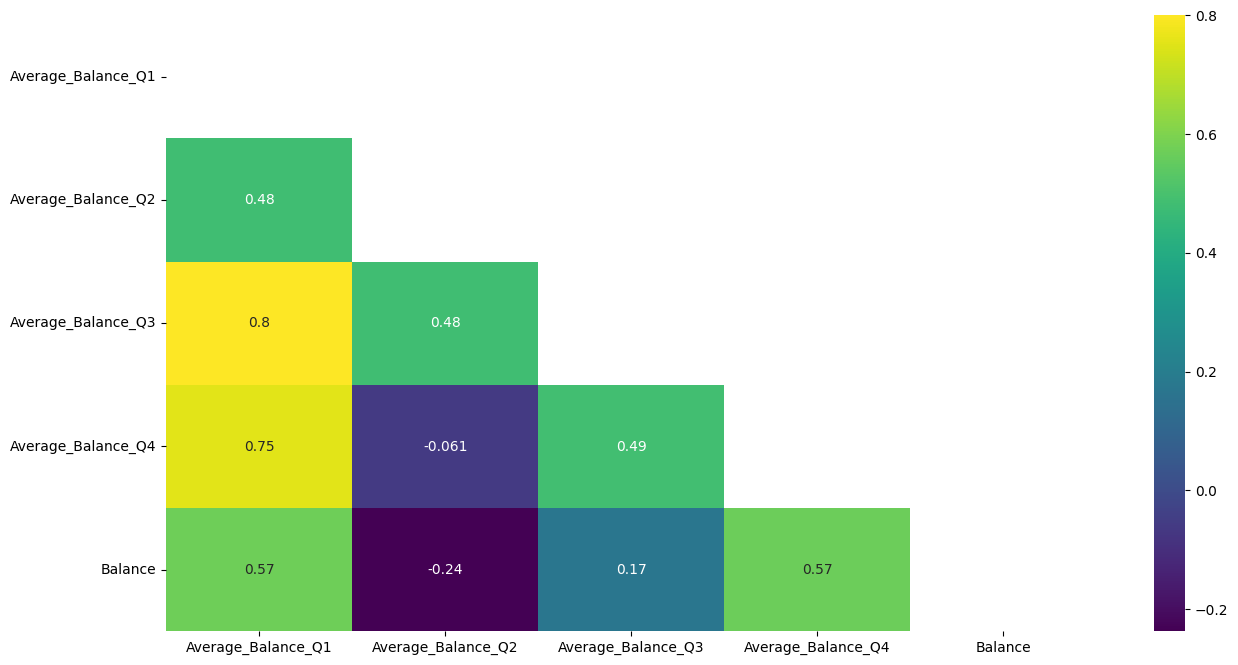

In [17]:
plt.figure(figsize=(15,8))
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, cmap="viridis", annot = True, mask = mask); #barra lateral

## Gestión de Outliers y Nulos

### Nulos 

In [18]:
#Porcentaje de nulos en nuestros datos

df.stb.missing()

missing  total   percent
Balance                    24  18000  0.133333
Average_Balance_Q4         24  18000  0.133333
Average_Balance_Q3         24  18000  0.133333
Average_Balance_Q2         24  18000  0.133333
Average_Balance_Q1         24  18000  0.133333
Homes_Owned                 0  18000  0.000000
Own_Your_Home               0  18000  0.000000
Household_Size              0  18000  0.000000
Customer_Number             0  18000  0.000000
Offer_Accepted              0  18000  0.000000
Credit_Rating               0  18000  0.000000
Overdraft_Protection        0  18000  0.000000
Bank_Accounts_Open          0  18000  0.000000
Income_Level                0  18000  0.000000
Mailer_Type                 0  18000  0.000000
Reward                      0  18000  0.000000
Credit_Cards_Held           0  18000  0.000000

A continuación vamos a sustituir los nulos con distintos métodos para ver cual sería el que da mayor homogeneidad con los datos que ya tenemos:

#### - KNN

In [19]:
columnas_numeric.head(2)

Average_Balance_Q1  Average_Balance_Q2  Average_Balance_Q3  \
0             1160.75              1669.0               877.0   
1              147.25                39.0               106.0   

   Average_Balance_Q4  Balance  
0              1095.0   1002.0  
1                78.0    366.0

In [20]:
imputerKNN = KNNImputer(n_neighbors=5)
imputerKNN.fit(columnas_numeric)

KNNImputer()

In [21]:
numericas_knn= imputerKNN.transform(columnas_numeric)

In [22]:
df_KNN = pd.DataFrame(numericas_knn, columns = columnas_numeric.columns)
df_KNN.head()

Average_Balance_Q1  Average_Balance_Q2  Average_Balance_Q3  \
0             1160.75              1669.0               877.0   
1              147.25                39.0               106.0   
2              276.50               367.0               352.0   
3             1219.00              1578.0              1760.0   
4             1211.00              2140.0              1357.0   

   Average_Balance_Q4  Balance  
0              1095.0   1002.0  
1                78.0    366.0  
2               145.0    242.0  
3              1119.0    419.0  
4               982.0    365.0

#### - Iterative Imputer 

In [23]:
imputer = IterativeImputer()

In [24]:
imputer.fit(columnas_numeric)

IterativeImputer()

In [25]:
df_iter = pd.DataFrame(imputer.transform(columnas_numeric), columns = columnas_numeric.columns)
df_iter.head()

Average_Balance_Q1  Average_Balance_Q2  Average_Balance_Q3  \
0             1160.75              1669.0               877.0   
1              147.25                39.0               106.0   
2              276.50               367.0               352.0   
3             1219.00              1578.0              1760.0   
4             1211.00              2140.0              1357.0   

   Average_Balance_Q4  Balance  
0              1095.0   1002.0  
1                78.0    366.0  
2               145.0    242.0  
3              1119.0    419.0  
4               982.0    365.0

#### - Conclusión Método Nulos 

In [26]:
df_iter.describe().T

count         mean         std    min       25%     50%  \
Average_Balance_Q1  18000.0   940.515562  350.064214  48.25  787.9375  1006.5   
Average_Balance_Q2  18000.0   910.450656  619.663515   0.00  393.0000   773.0   
Average_Balance_Q3  18000.0   999.392190  457.097214   0.00  664.0000  1032.0   
Average_Balance_Q4  18000.0  1042.033600  553.083487   0.00  633.0000   946.0   
Balance             18000.0   810.185803  558.628553   0.00  363.7500   704.0   

                          75%      max  
Average_Balance_Q1  1152.5625  3366.25  
Average_Balance_Q2  1520.2500  3450.00  
Average_Balance_Q3  1342.0000  3421.00  
Average_Balance_Q4  1462.0000  3823.00  
Balance             1211.0000  4215.00

In [27]:
df_KNN.describe().T

count         mean         std    min       25%     50%  \
Average_Balance_Q1  18000.0   940.515562  350.064214  48.25  787.9375  1006.5   
Average_Balance_Q2  18000.0   910.450656  619.663515   0.00  393.0000   773.0   
Average_Balance_Q3  18000.0   999.392190  457.097214   0.00  664.0000  1032.0   
Average_Balance_Q4  18000.0  1042.033600  553.083487   0.00  633.0000   946.0   
Balance             18000.0   810.185803  558.628553   0.00  363.7500   704.0   

                          75%      max  
Average_Balance_Q1  1152.5625  3366.25  
Average_Balance_Q2  1520.2500  3450.00  
Average_Balance_Q3  1342.0000  3421.00  
Average_Balance_Q4  1462.0000  3823.00  
Balance             1211.0000  4215.00

In [28]:
columnas_numeric.describe().T

count         mean         std    min     25%     50%  \
Average_Balance_Q1  17976.0   940.515562  350.297837  48.25  787.50  1007.0   
Average_Balance_Q2  17976.0   910.450656  620.077060   0.00  392.75   772.0   
Average_Balance_Q3  17976.0   999.392190  457.402268   0.00  663.00  1032.0   
Average_Balance_Q4  17976.0  1042.033600  553.452599   0.00  633.00   945.5   
Balance             17976.0   810.185803  559.001365   0.00  363.00   703.0   

                        75%      max  
Average_Balance_Q1  1153.25  3366.25  
Average_Balance_Q2  1521.00  3450.00  
Average_Balance_Q3  1342.00  3421.00  
Average_Balance_Q4  1463.00  3823.00  
Balance             1212.00  4215.00

Vemos que los resultados son muy similares por lo que ambos métodos nos podrían servir para gestionar nuestros nulos. En este caso nos decantamos por el método de KNN, por encontrarse en proceso de prueba/modificaciones el método de Iterative.

In [29]:
columnas_numeric= df_KNN

In [30]:
df.update(columnas_numeric)
df.describe().T

count         mean          std    min        25%  \
Customer_Number     18000.0  9000.500000  5196.296758   1.00  4500.7500   
Bank_Accounts_Open  18000.0     1.255778     0.472501   1.00     1.0000   
Credit_Cards_Held   18000.0     1.903500     0.797009   1.00     1.0000   
Homes_Owned         18000.0     1.203444     0.427341   1.00     1.0000   
Household_Size      18000.0     3.499056     1.114182   1.00     3.0000   
Average_Balance_Q1  18000.0   940.515562   350.064214  48.25   787.9375   
Average_Balance_Q2  18000.0   910.450656   619.663515   0.00   393.0000   
Average_Balance_Q3  18000.0   999.392190   457.097214   0.00   664.0000   
Average_Balance_Q4  18000.0  1042.033600   553.083487   0.00   633.0000   
Balance             18000.0   810.185803   558.628553   0.00   363.7500   

                       50%         75%       max  
Customer_Number     9000.5  13500.2500  18000.00  
Bank_Accounts_Open     1.0      1.0000      3.00  
Credit_Cards_Held      2.0      2.0000      4.00  
Homes_Owned            1.0      1.0000      3.00  
Household_Size         3.0      4.0000      9.00  
Average_Balance_Q1  1006.5   1152.5625   3366.25  
Average_Balance_Q2   773.0   1520.2500   3450.00  
Average_Balance_Q3  1032.0   1342.0000   3421.00  
Average_Balance_Q4   946.0   1462.0000   3823.00  
Balance              704.0   1211.0000   4215.00

### Outliers 

In [31]:
columnas_numeric.head(2)

Average_Balance_Q1  Average_Balance_Q2  Average_Balance_Q3  \
0             1160.75              1669.0               877.0   
1              147.25                39.0               106.0   

   Average_Balance_Q4  Balance  
0              1095.0   1002.0  
1                78.0    366.0

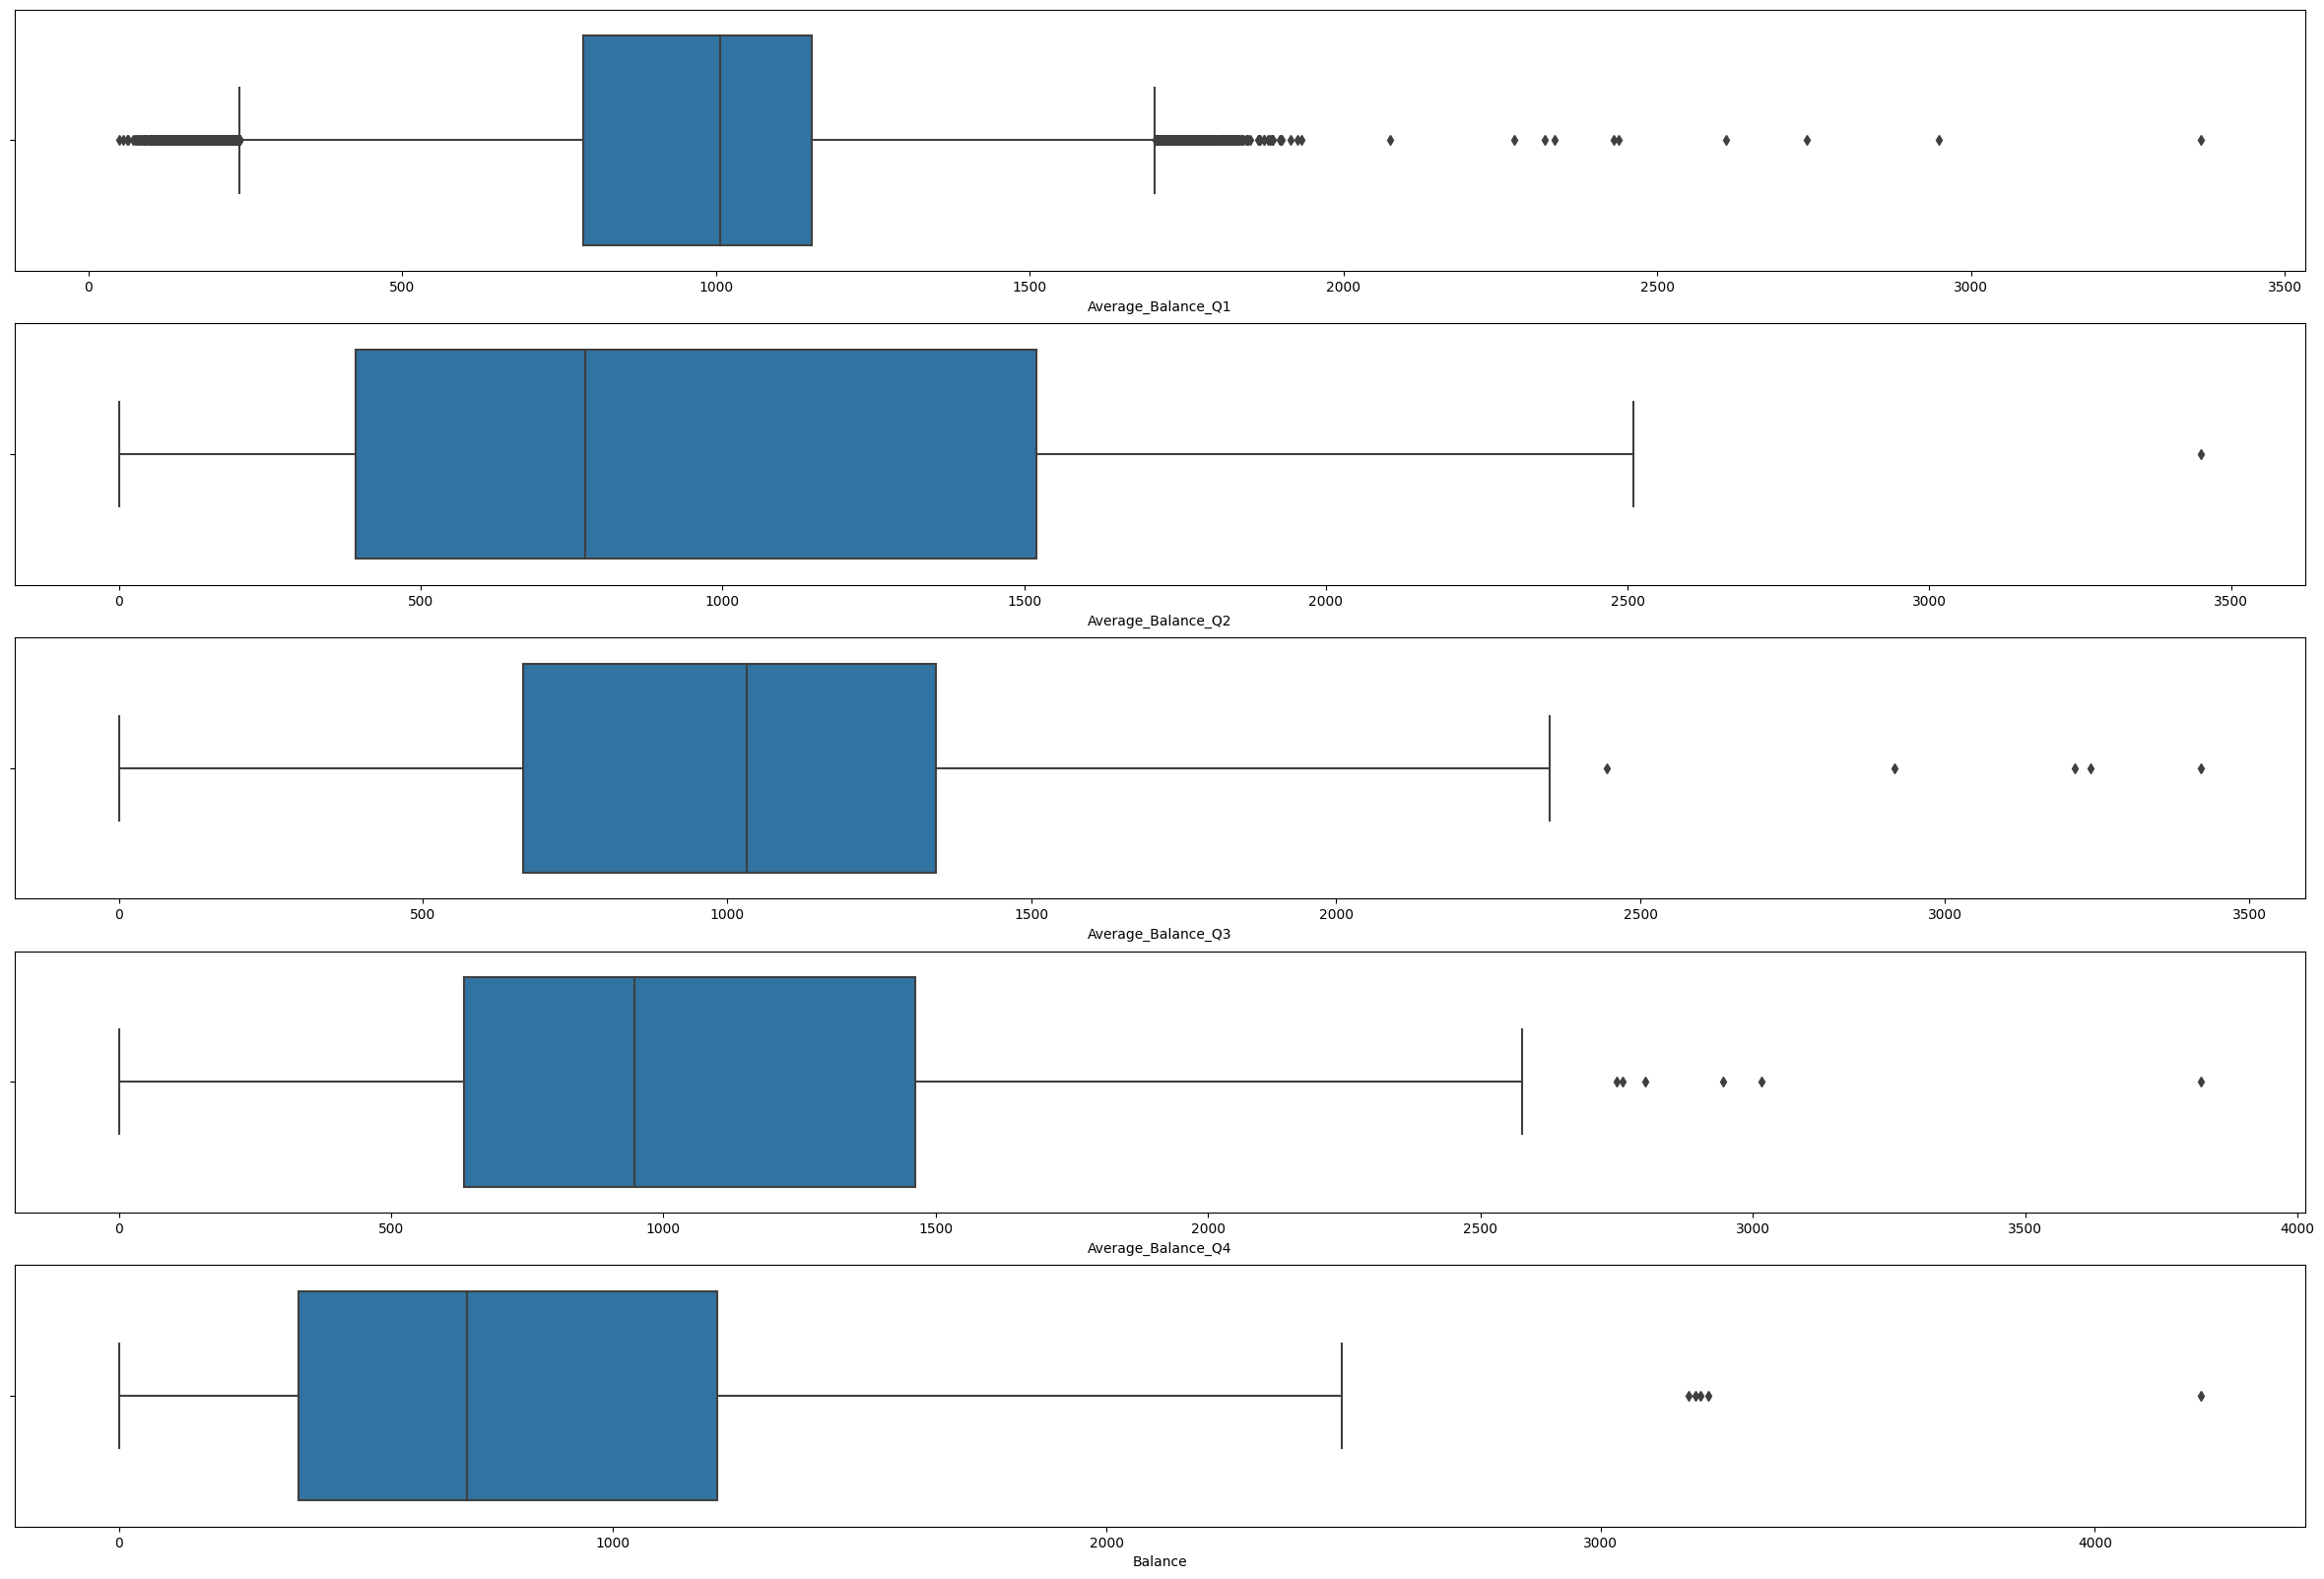

In [32]:
fig, ax = plt.subplots(5, 1, figsize=(30,20))

for i in range(len(columnas_numeric.columns)):
    sns.boxplot(x=columnas_numeric.columns[i], data=columnas_numeric, ax=ax[i])
plt.show()

In [33]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    
    return dicc_indices 

In [34]:
lista_columnas = columnas_numeric.columns
lista_columnas

Index(['Average_Balance_Q1', 'Average_Balance_Q2', 'Average_Balance_Q3',
       'Average_Balance_Q4', 'Balance'],
      dtype='object')

In [35]:
ind = detectar_outliers(lista_columnas, df)
#print(ind)

In [36]:
ind.keys()

dict_keys(['Average_Balance_Q1', 'Average_Balance_Q2', 'Average_Balance_Q3', 'Average_Balance_Q4', 'Balance'])

In [37]:
#Iteramos por el diccionario

for k, v in ind.items():
    
    mediana = df[k].median() # calculamos la mediana para cada una de las columnas que tenemos en nuestro diccionario
    
    for i in v: #iteramos por la lista de valores para cada columna
        
        df.loc[i,k] = mediana

In [38]:
df.describe().T

count         mean          std    min      25%     50%  \
Customer_Number     18000.0  9000.500000  5196.296758    1.0  4500.75  9000.5   
Bank_Accounts_Open  18000.0     1.255778     0.472501    1.0     1.00     1.0   
Credit_Cards_Held   18000.0     1.903500     0.797009    1.0     1.00     2.0   
Homes_Owned         18000.0     1.203444     0.427341    1.0     1.00     1.0   
Household_Size      18000.0     3.499056     1.114182    1.0     3.00     3.0   
Average_Balance_Q1  18000.0   982.265340   267.348693  241.0   874.25  1006.5   
Average_Balance_Q2  18000.0   910.301934   619.375156    0.0   393.00   773.0   
Average_Balance_Q3  18000.0   998.832301   455.785048    0.0   664.00  1032.0   
Average_Balance_Q4  18000.0  1041.343545   551.867966    0.0   633.00   946.0   
Balance             18000.0   809.436748   556.918541    0.0   363.75   704.0   

                         75%       max  
Customer_Number     13500.25  18000.00  
Bank_Accounts_Open      1.00      3.00  
Credit_Cards_Held       2.00      4.00  
Homes_Owned             1.00      3.00  
Household_Size          4.00      9.00  
Average_Balance_Q1   1142.25   1699.25  
Average_Balance_Q2   1520.00   2509.00  
Average_Balance_Q3   1341.25   2351.00  
Average_Balance_Q4   1461.00   2576.00  
Balance              1210.25   2475.00

### Estandarización

🛎 Estandarizamos nuestras variables numéricas, excluyendo las discretas.

In [39]:
df.head()

Customer_Number Offer_Accepted     Reward Mailer_Type Income_Level  \
0                1             No  Air Miles      Letter         High   
1                2             No  Air Miles      Letter       Medium   
2                3             No  Air Miles    Postcard         High   
3                4             No  Air Miles      Letter       Medium   
4                5             No  Air Miles      Letter       Medium   

   Bank_Accounts_Open Overdraft_Protection Credit_Rating  Credit_Cards_Held  \
0                   1                   No          High                  2   
1                   1                   No        Medium                  2   
2                   2                   No        Medium                  2   
3                   2                   No          High                  1   
4                   1                   No        Medium                  2   

   Homes_Owned  Household_Size Own_Your_Home  Average_Balance_Q1  \
0            1               4            No             1160.75   
1            2               5           Yes             1006.50   
2            1               2           Yes              276.50   
3            1               4            No             1219.00   
4            1               6           Yes             1211.00   

   Average_Balance_Q2  Average_Balance_Q3  Average_Balance_Q4  Balance  
0              1669.0               877.0              1095.0   1002.0  
1                39.0               106.0                78.0    366.0  
2               367.0               352.0               145.0    242.0  
3              1578.0              1760.0              1119.0    419.0  
4              2140.0              1357.0               982.0    365.0

In [40]:
columnas_numeric.head()

Average_Balance_Q1  Average_Balance_Q2  Average_Balance_Q3  \
0             1160.75              1669.0               877.0   
1              147.25                39.0               106.0   
2              276.50               367.0               352.0   
3             1219.00              1578.0              1760.0   
4             1211.00              2140.0              1357.0   

   Average_Balance_Q4  Balance  
0              1095.0   1002.0  
1                78.0    366.0  
2               145.0    242.0  
3              1119.0    419.0  
4               982.0    365.0

In [41]:
scaler = StandardScaler()

scaler.fit(df[['Average_Balance_Q1','Average_Balance_Q2', 'Average_Balance_Q3', 'Average_Balance_Q4','Balance']])

X_escaladas = scaler.transform(df[['Average_Balance_Q1','Average_Balance_Q2', 'Average_Balance_Q3', 'Average_Balance_Q4',
                                   'Balance']])
df[['Average_Balance_Q1','Average_Balance_Q2', 'Average_Balance_Q3', 'Average_Balance_Q4','Balance']] = X_escaladas
df.head()

Customer_Number Offer_Accepted     Reward Mailer_Type Income_Level  \
0                1             No  Air Miles      Letter         High   
1                2             No  Air Miles      Letter       Medium   
2                3             No  Air Miles    Postcard         High   
3                4             No  Air Miles      Letter       Medium   
4                5             No  Air Miles      Letter       Medium   

   Bank_Accounts_Open Overdraft_Protection Credit_Rating  Credit_Cards_Held  \
0                   1                   No          High                  2   
1                   1                   No        Medium                  2   
2                   2                   No        Medium                  2   
3                   2                   No          High                  1   
4                   1                   No        Medium                  2   

   Homes_Owned  Household_Size Own_Your_Home  Average_Balance_Q1  \
0            1               4            No            0.667629   
1            2               5           Yes            0.090651   
2            1               2           Yes           -2.639942   
3            1               4            No            0.885515   
4            1               6           Yes            0.855591   

   Average_Balance_Q2  Average_Balance_Q3  Average_Balance_Q4   Balance  
0            1.224975           -0.267310            0.097230  0.345775  
1           -1.406783           -1.958943           -1.745654 -0.796255  
2           -0.877202           -1.419200           -1.624244 -1.018915  
3            1.078049            1.670061            0.140720 -0.701086  
4            1.985440            0.785848           -0.107535 -0.798050

In [240]:
# guardamos el escaler en un pickle

import pickle

with open('datos/estandarizacion.pkl', 'wb') as s:
    pickle.dump(scaler, s)

### Encoding 

In [42]:
df.select_dtypes(include=np.number).columns

Index(['Customer_Number', 'Bank_Accounts_Open', 'Credit_Cards_Held',
       'Homes_Owned', 'Household_Size', 'Average_Balance_Q1',
       'Average_Balance_Q2', 'Average_Balance_Q3', 'Average_Balance_Q4',
       'Balance'],
      dtype='object')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Customer_Number       18000 non-null  int64   
 1   Offer_Accepted        18000 non-null  category
 2   Reward                18000 non-null  object  
 3   Mailer_Type           18000 non-null  object  
 4   Income_Level          18000 non-null  object  
 5   Bank_Accounts_Open    18000 non-null  int64   
 6   Overdraft_Protection  18000 non-null  object  
 7   Credit_Rating         18000 non-null  object  
 8   Credit_Cards_Held     18000 non-null  int64   
 9   Homes_Owned           18000 non-null  int64   
 10  Household_Size        18000 non-null  int64   
 11  Own_Your_Home         18000 non-null  object  
 12  Average_Balance_Q1    18000 non-null  float64 
 13  Average_Balance_Q2    18000 non-null  float64 
 14  Average_Balance_Q3    18000 non-null  float64 
 15  Av

In [44]:
# Chequeamos valores únicos

print('Offer Accepted has', df['Offer_Accepted'].unique(), 'categories')
print("---------------------------------------------------------------------------")
print('Reward has', df['Reward'].unique(), 'categories')
print("---------------------------------------------------------------------------")
print('Mailer Type has', df['Mailer_Type'].unique(), 'categories')
print("---------------------------------------------------------------------------")
print('Income Level has', df['Income_Level'].unique(), 'categories')
print("---------------------------------------------------------------------------")
print('Bank Accounts Open has', df['Bank_Accounts_Open'].unique(), 'categories')
print("---------------------------------------------------------------------------")
print('Overdraft Protection has', df['Overdraft_Protection'].unique(), 'categories')
print("---------------------------------------------------------------------------")
print('Credit Rating', df['Credit_Rating'].unique(), 'categories')
print("---------------------------------------------------------------------------")
print('Credit Cards Held', df['Credit_Cards_Held'].unique(), 'categories')
print("---------------------------------------------------------------------------")
print('Homes Owned', df['Homes_Owned'].unique(), 'categories')
print("---------------------------------------------------------------------------")
print('Household Size', df['Household_Size'].unique(), 'categories')
print("---------------------------------------------------------------------------")
print('Own Your Home', df['Own_Your_Home'].unique(), 'categories')

Offer Accepted has ['No', 'Yes']
Categories (2, object): ['No', 'Yes'] categories
---------------------------------------------------------------------------
Reward has ['Air Miles' 'Cash Back' 'Points'] categories
---------------------------------------------------------------------------
Mailer Type has ['Letter' 'Postcard'] categories
---------------------------------------------------------------------------
Income Level has ['High' 'Medium' 'Low'] categories
---------------------------------------------------------------------------
Bank Accounts Open has [1 2 3] categories
---------------------------------------------------------------------------
Overdraft Protection has ['No' 'Yes'] categories
---------------------------------------------------------------------------
Credit Rating ['High' 'Medium' 'Low'] categories
---------------------------------------------------------------------------
Credit Cards Held [2 1 3 4] categories
-------------------------------------------------

In [45]:
orden_offer = ['No','Yes']
orden_income = ["Low", "Medium", "High"]
orden_accounts= ["1","2","3"]
orden_overdraft = ["No","Yes"]
orden_rating = ["Low", "Medium", "High"]
orden_cards= ["1","2","3","4"]
orden_home= ["1","2","3"]
orden_size= ["1","2","3","4","5","6","7","8","9"]
orden_own = ["No","Yes"]

In [46]:
def ordinal_encoder(orden, df, columna):
    
    ordinal = OrdinalEncoder(categories = [orden], dtype = int)
    transformados_oe = ordinal.fit_transform(df[[columna]])
    df[columna] = transformados_oe

    return df

In [47]:
def one_hot_encoder(dff, columnas):
    
    oh = OneHotEncoder()
    
    transformados = oh.fit_transform(dff[columnas])
    
    oh_df = pd.DataFrame(transformados.toarray(), columns = oh.get_feature_names_out(), dtype = int)
    
    dff[oh_df.columns] = oh_df
    
    dff.drop(columnas, axis = 1, inplace = True)
    
    return dff

In [48]:
df = ordinal_encoder(orden_offer, df, 'Offer_Accepted')
df = ordinal_encoder(orden_income, df, 'Income_Level')
df = ordinal_encoder(orden_accounts, df, 'Bank_Accounts_Open')
df = ordinal_encoder(orden_overdraft, df, 'Overdraft_Protection')
df = ordinal_encoder(orden_rating, df, 'Credit_Rating')
df = ordinal_encoder(orden_cards, df, 'Credit_Cards_Held')
df = ordinal_encoder(orden_home, df, 'Homes_Owned')
df = ordinal_encoder(orden_size, df, 'Household_Size')
df = ordinal_encoder(orden_own, df, 'Own_Your_Home')

In [49]:
df = one_hot_encoder(df, ["Reward"])
df = one_hot_encoder(df, ["Mailer_Type"])

In [50]:
df.head()

Customer_Number  Offer_Accepted  Income_Level  Bank_Accounts_Open  \
0                1               0             2                   0   
1                2               0             1                   0   
2                3               0             2                   1   
3                4               0             1                   1   
4                5               0             1                   0   

   Overdraft_Protection  Credit_Rating  Credit_Cards_Held  Homes_Owned  \
0                     0              2                  1            0   
1                     0              1                  1            1   
2                     0              1                  1            0   
3                     0              2                  0            0   
4                     0              1                  1            0   

   Household_Size  Own_Your_Home  Average_Balance_Q1  Average_Balance_Q2  \
0               3              0            0.667629            1.224975   
1               4              1            0.090651           -1.406783   
2               1              1           -2.639942           -0.877202   
3               3              0            0.885515            1.078049   
4               5              1            0.855591            1.985440   

   Average_Balance_Q3  Average_Balance_Q4   Balance  Reward_Air Miles  \
0           -0.267310            0.097230  0.345775                 1   
1           -1.958943           -1.745654 -0.796255                 1   
2           -1.419200           -1.624244 -1.018915                 1   
3            1.670061            0.140720 -0.701086                 1   
4            0.785848           -0.107535 -0.798050                 1   

   Reward_Cash Back  Reward_Points  Mailer_Type_Letter  Mailer_Type_Postcard  
0                 0              0                   1                     0  
1                 0              0                   1                     0  
2                 0              0                   0                     1  
3                 0              0                   1                     0  
4                 0              0                   1                     0

In [51]:
df["Offer_Accepted"].value_counts()

0    16977
1     1023
Name: Offer_Accepted, dtype: int64

### Desbalanceo Datos

En este caso vamos a aplicar el upsample para igualar así nuestra clase minoritaria y evitar perder datos de nuestra parte mayoritaria que nos pueden ser útiles en un futuro. 

In [52]:
# separamos los datos en X e y. 

X = df.drop(["Offer_Accepted"], axis = 1)
y = df["Offer_Accepted"]

In [53]:
# iniciamos el método upsample

up = RandomOverSampler()

In [56]:
# ajustamos el modelo

X_up, y_up = up.fit_resample(X, y)

In [57]:
y_up.value_counts()

0    16977
1    16977
Name: Offer_Accepted, dtype: int64

In [58]:
# Concatenamos X e Y 

df = pd.concat([X_up, y_up], axis = 1)
df.head(2)

Customer_Number  Income_Level  Bank_Accounts_Open  Overdraft_Protection  \
0                1             2                   0                     0   
1                2             1                   0                     0   

   Credit_Rating  Credit_Cards_Held  Homes_Owned  Household_Size  \
0              2                  1            0               3   
1              1                  1            1               4   

   Own_Your_Home  Average_Balance_Q1  Average_Balance_Q2  Average_Balance_Q3  \
0              0            0.667629            1.224975           -0.267310   
1              1            0.090651           -1.406783           -1.958943   

   Average_Balance_Q4   Balance  Reward_Air Miles  Reward_Cash Back  \
0            0.097230  0.345775                 1                 0   
1           -1.745654 -0.796255                 1                 0   

   Reward_Points  Mailer_Type_Letter  Mailer_Type_Postcard  Offer_Accepted  
0              0                   1                     0               0  
1              0                   1                     0               0

## Ajuste Modelo 

In [59]:
# dividimos el dataset en variables predictoras y respuesta

X = df.drop(["Customer_Number","Offer_Accepted"], axis = 1) # variables predictoras
y = df["Offer_Accepted"] # variable respuesta 

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 666)

In [61]:
y_train.describe()

count    27163.000000
mean         0.501270
std          0.500008
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Offer_Accepted, dtype: float64

In [62]:
y_test.describe()

count    6791.000000
mean        0.494920
std         0.500011
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Offer_Accepted, dtype: float64

## Logistic Regression

In [63]:
lr = LogisticRegression(max_iter = 100000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

In [64]:
y_pred_lr_test = lr.predict(X_test)
y_pred_lr_train = lr.predict(X_train)

In [65]:
def matriz_confusion(clases_reales, clases_predichas, total_filas_test):
  
    matriz = confusion_matrix(clases_reales, clases_predichas)

    plt.figure(figsize = (12, 8))
    sns.heatmap(matriz, square=True, annot=True, fmt="d", cmap = "viridis")

    plt.xlabel('valor predicho')
    plt.ylabel('valor real')
    plt.show()

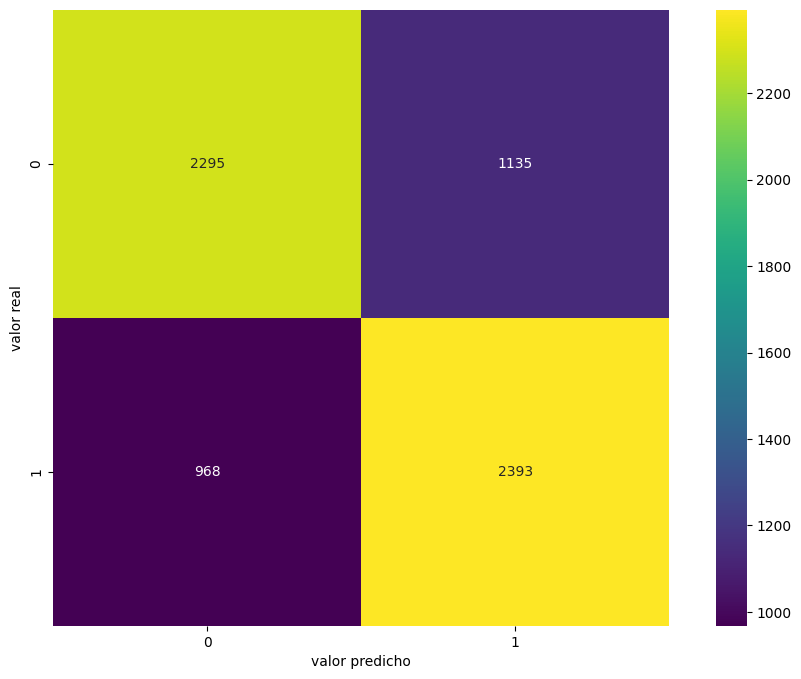

In [66]:
matriz_logistica = matriz_confusion(y_test, y_pred_lr_test, y_test.shape[0])
matriz_logistica

In [67]:
# vamos a hacernos una función
# ==============================================================================

def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [68]:
results_log = metricas(y_test, y_pred_lr_test, y_train, y_pred_lr_train, "Regresión logistica")
results_log

accuracy  precision   recall        f1    kapppa    set  \
0  0.690325   0.678288  0.71199  0.694731  0.380896   test   
1  0.692633   0.683968  0.71908  0.701085  0.385182  train   

                modelo  
0  Regresión logistica  
1  Regresión logistica

## Decision Tree Classifier


In [69]:
arbol = DecisionTreeClassifier()
arbol.fit(X_train, y_train)

DecisionTreeClassifier()

##### Definición Hiperparámetros 

In [70]:
# max features

max_features = np.sqrt(len(X_train.columns))
max_features

4.242640687119285

In [71]:
y_pred_train_dt = arbol.predict(X_train)
y_pred_test_dt = arbol.predict(X_test)

In [72]:
results_dt = metricas(y_test, y_pred_test_dt,y_train, y_pred_train_dt, "Decission Tree I" )
results_dt

accuracy  precision  recall        f1    kapppa    set            modelo
0  0.966868   0.937256     1.0  0.967612  0.933774   test  Decission Tree I
1  1.000000   1.000000     1.0  1.000000  1.000000  train  Decission Tree I

In [73]:
# veamos cual es la profundidad de nuestro árbol

print(arbol.tree_.max_depth)

30


Hiperparámetros claros, hagamos el modelo: 

In [74]:
depth= list(range(1,31))

In [75]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param = {"max_depth": depth,
         "min_samples_split": [50, 100, 150, 200, 250],
         "max_features": [1,2,3,4], 
         "min_samples_leaf": [50, 100, 150, 200, 250]}

# Búsqueda por grid search con validación cruzada
# ==============================================================================
arbol2 = GridSearchCV(
        estimator = DecisionTreeClassifier(), 
        param_grid = param, 
        n_jobs = -1,
        verbose = 1, 
        cv = 10, 
        return_train_score = True, 
        scoring = "neg_mean_squared_error")

In [76]:
%%time
arbol2.fit(X_train, y_train)

Fitting 10 folds for each of 3000 candidates, totalling 30000 fits
CPU times: user 15.4 s, sys: 5.94 s, total: 21.3 s
Wall time: 1min 42s


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [50, 100, 150, 200, 250],
                         'min_samples_split': [50, 100, 150, 200, 250]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [77]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
arbol2.best_params_

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------


{'max_depth': 30,
 'max_features': 4,
 'min_samples_leaf': 50,
 'min_samples_split': 100}

In [78]:
# creamos el modelo con los mejores parámetros para hacer las predicciones
arbol_def = DecisionTreeClassifier( max_depth =  30, max_features=4, min_samples_leaf= 50, min_samples_split=100)
arbol_def.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=30, max_features=4, min_samples_leaf=50,
                       min_samples_split=100)

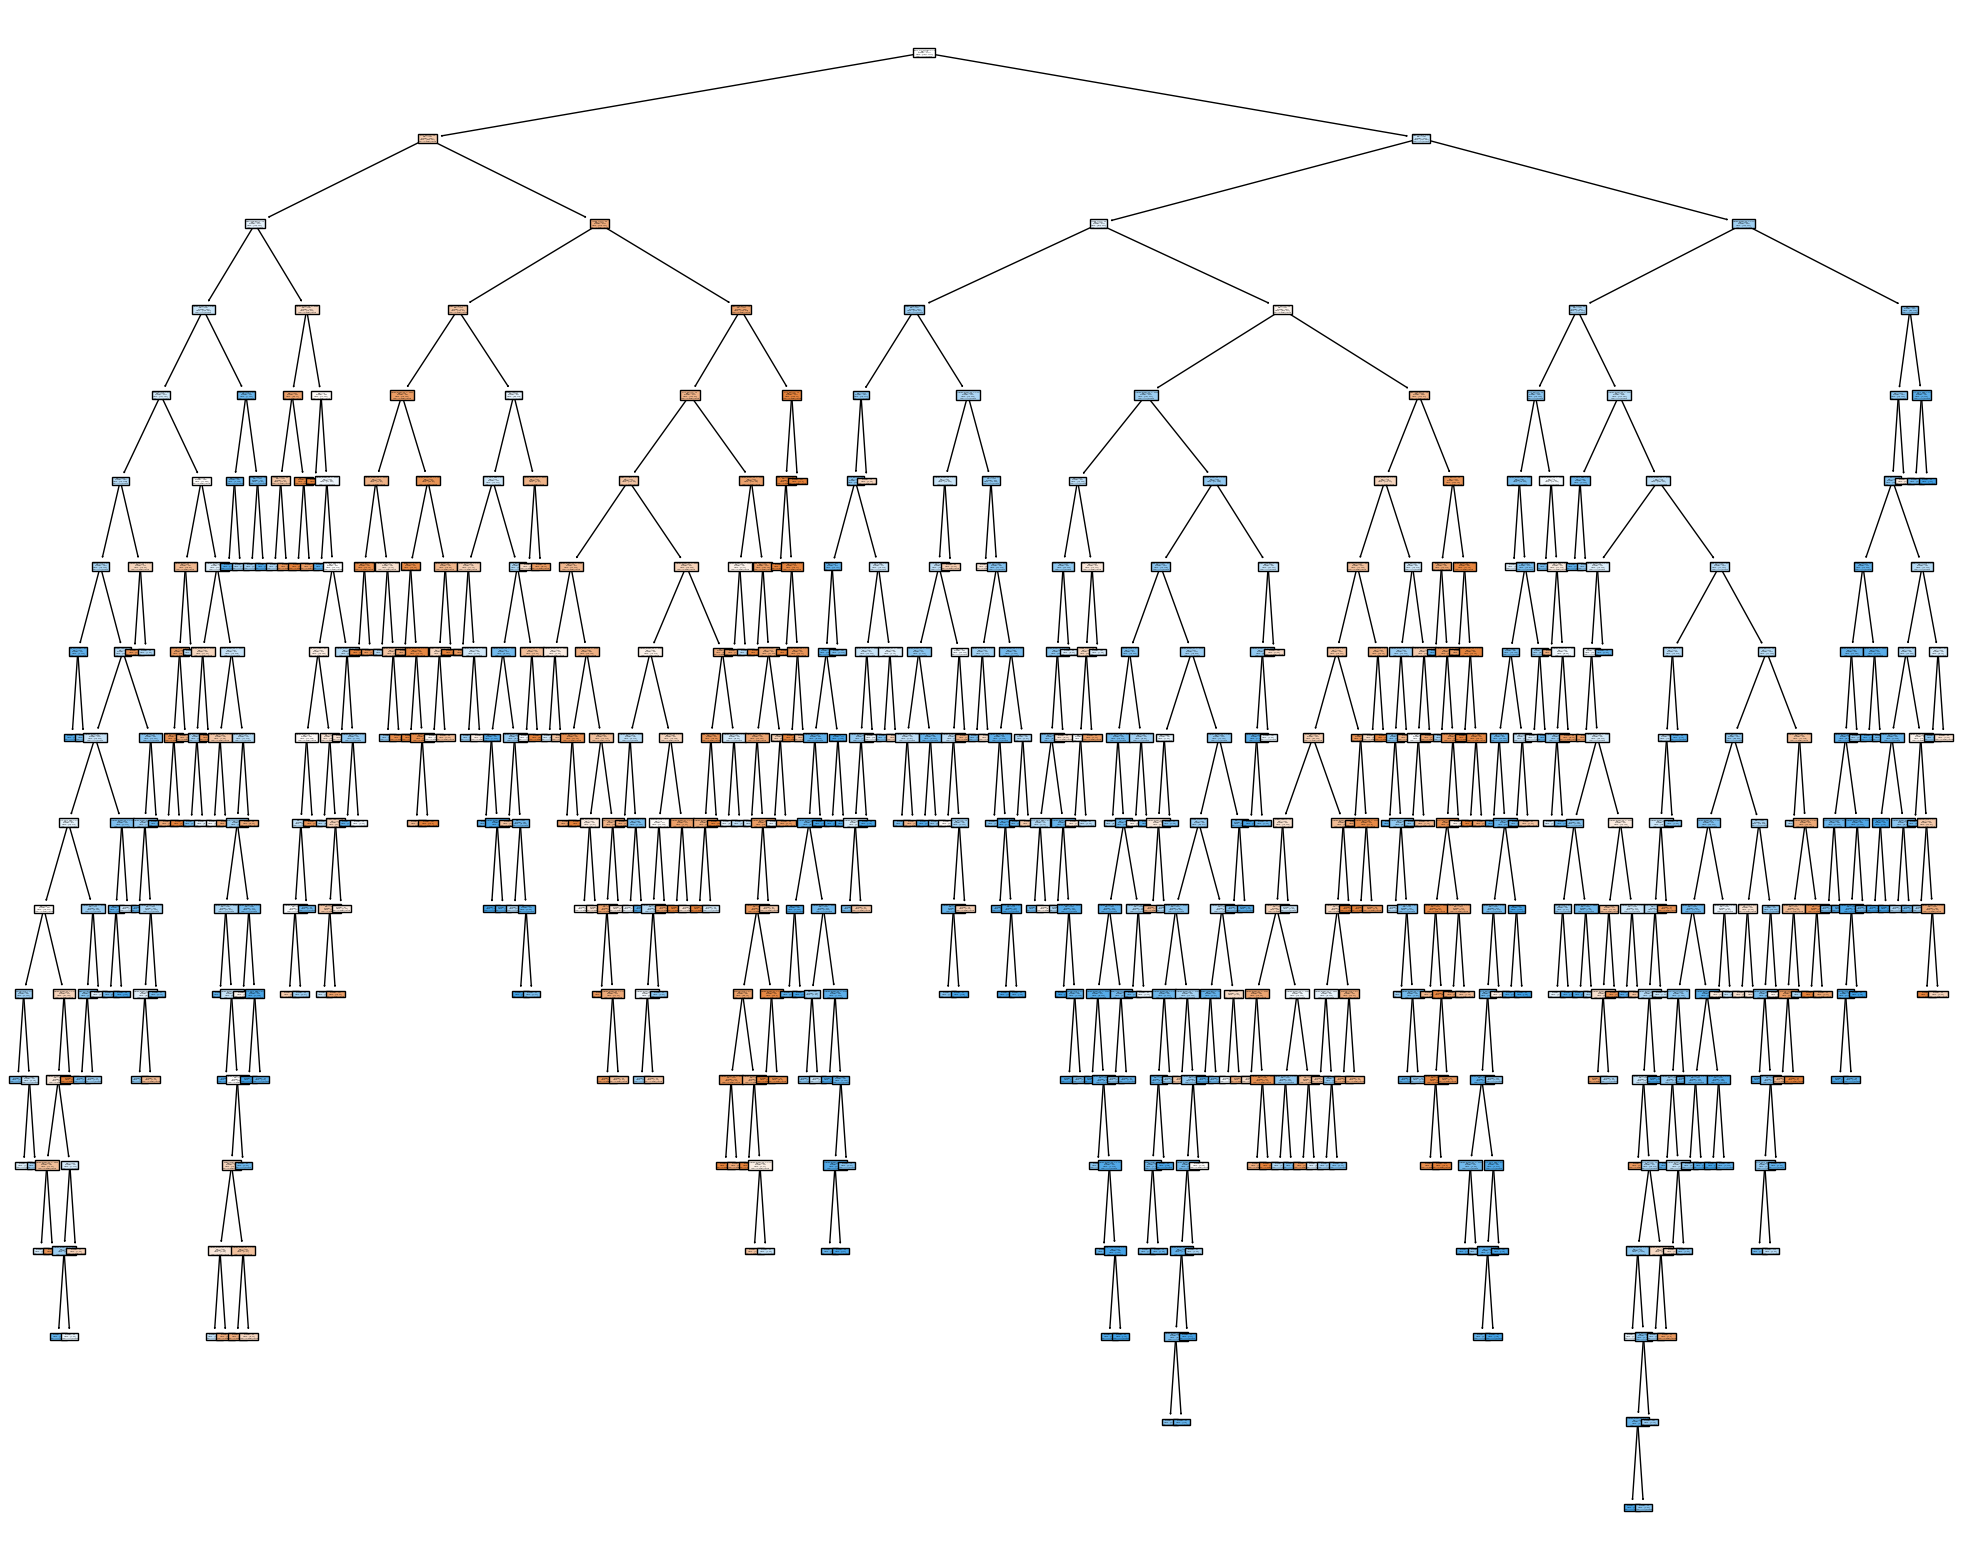

In [79]:
# Ahora vamos a plotear el resultado del modelo en un árbol
fig = plt.figure(figsize=(25,20))
tree.plot_tree(arbol_def,
                   feature_names=X.columns,
                   class_names=['No Heart_Disease', "Heart_Disease"],
                   filled=True)
plt.show()

In [80]:
# hacemos las predicciones para el train y el test
y_pred_arbol_test= arbol_def.predict(X_test)
y_pred_arbol_train= arbol_def.predict(X_train)

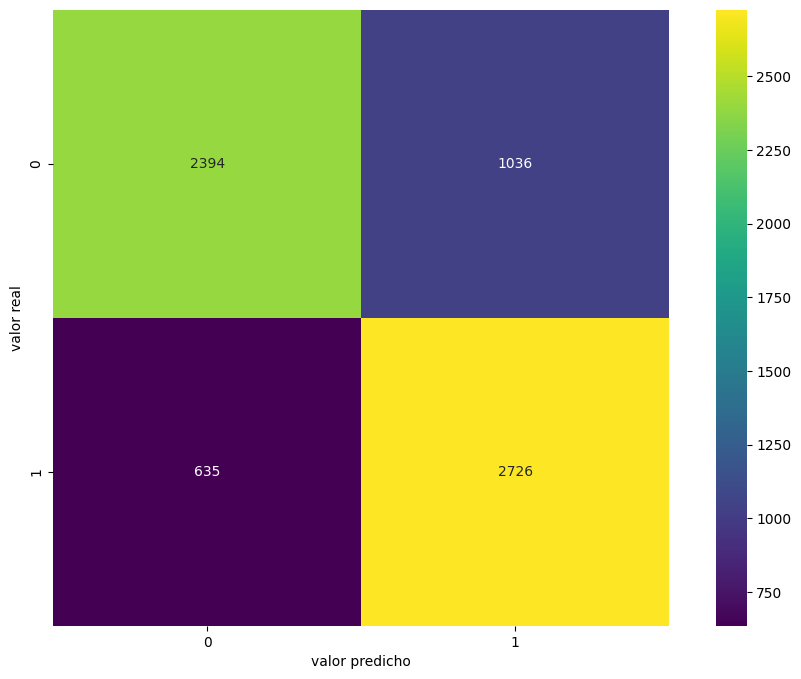

In [81]:
matriz_arbol = matriz_confusion(y_test, y_pred_arbol_test, y_test.shape[0])
matriz_arbol

In [82]:
results_decission_tree2 =  metricas(y_test, y_pred_arbol_test, y_train, y_pred_arbol_train, "Decission Tree II")
results_decission_tree2

accuracy  precision    recall        f1    kapppa    set             modelo
0  0.753939   0.724615  0.811068  0.765408  0.508417   test  Decission Tree II
1  0.773479   0.747792  0.827042  0.785423  0.546832  train  Decission Tree II

In [83]:
# juntamos los resultados con los del modelo anterior
df_all_results = pd.concat([results_log, results_decission_tree2], axis = 0)
df_all_results

accuracy  precision    recall        f1    kapppa    set  \
0  0.690325   0.678288  0.711990  0.694731  0.380896   test   
1  0.692633   0.683968  0.719080  0.701085  0.385182  train   
0  0.753939   0.724615  0.811068  0.765408  0.508417   test   
1  0.773479   0.747792  0.827042  0.785423  0.546832  train   

                modelo  
0  Regresión logistica  
1  Regresión logistica  
0    Decission Tree II  
1    Decission Tree II

## Random Forest 

In [84]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param = {"max_depth": depth,
         "min_samples_split": [50, 100, 150, 200, 250],
         "max_features": [1,2,3,4], 
         "min_samples_leaf": [50, 100, 150, 200, 250]}

# Búsqueda por grid search con validación cruzada (cross-validarion)
# ==============================================================================
random_forest = GridSearchCV(
        estimator = RandomForestClassifier(), 
        param_grid = param, 
        n_jobs = -1,
        verbose = 1,  
        cv = 10, 
        return_train_score = True, 
        scoring = "neg_mean_squared_error")

In [85]:
%%time
random_forest.fit(X_train, y_train)

Fitting 10 folds for each of 3000 candidates, totalling 30000 fits
CPU times: user 1min 32s, sys: 24.5 s, total: 1min 57s
Wall time: 2h 42min 8s


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [50, 100, 150, 200, 250],
                         'min_samples_split': [50, 100, 150, 200, 250]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [86]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")

random_forest.best_params_

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------


{'max_depth': 16,
 'max_features': 4,
 'min_samples_leaf': 50,
 'min_samples_split': 50}

In [88]:
# creamos el modelo con los mejores parámetros para hacer las predicciones
clf=RandomForestClassifier(min_samples_split= 50,
                           min_samples_leaf= 50,
                           max_features= 4,
                           max_depth= 16)
clf.fit(X_train,y_train)


RandomForestClassifier(max_depth=16, max_features=4, min_samples_leaf=50,
                       min_samples_split=50)

In [89]:
y_pred_clf_test= clf.predict(X_test)
y_pred_clf_train= clf.predict(X_train)

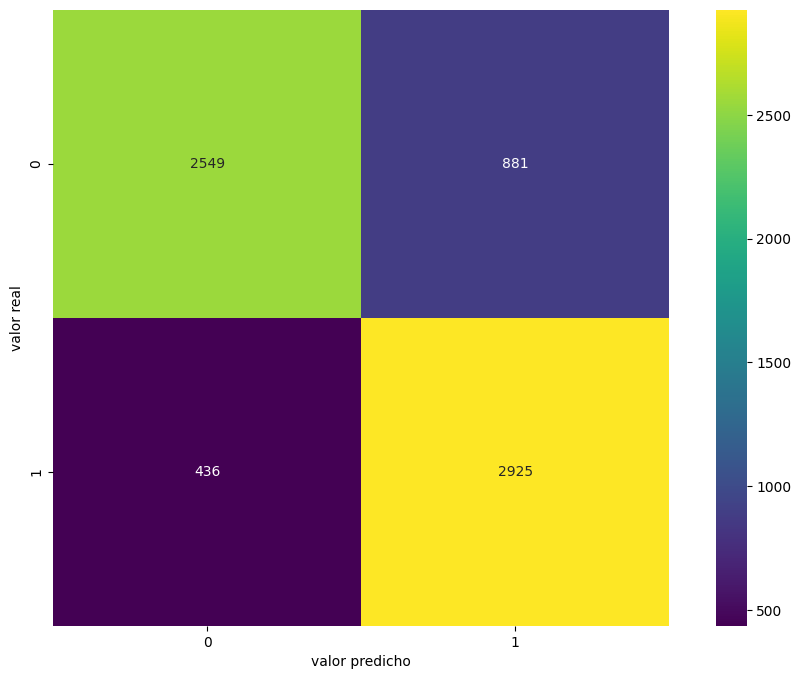

In [90]:
matriz_random = matriz_confusion(y_test, y_pred_clf_test, y_test.shape[0])
matriz_random

In [91]:
results_forest = metricas(y_test, y_pred_clf_test, y_train, y_pred_clf_train, "Random Forest")
df_all_results = pd.concat([df_all_results, results_forest], axis = 0)
df_all_results

accuracy  precision    recall        f1    kapppa    set  \
0  0.690325   0.678288  0.711990  0.694731  0.380896   test   
1  0.692633   0.683968  0.719080  0.701085  0.385182  train   
0  0.753939   0.724615  0.811068  0.765408  0.508417   test   
1  0.773479   0.747792  0.827042  0.785423  0.546832  train   
0  0.806067   0.768523  0.870277  0.816241  0.612610   test   
1  0.822810   0.787774  0.884915  0.833524  0.645507  train   

                modelo  
0  Regresión logistica  
1  Regresión logistica  
0    Decission Tree II  
1    Decission Tree II  
0        Random Forest  
1        Random Forest

## KNeighborsClassifier  

In [92]:
# qué métricas podemos usar en el cross_val_score
# ==============================================================================
from sklearn import metrics

metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'positive_likelihood_ratio', 'neg_negative_likelihood_ratio', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weig

In [98]:
knn_scores = []

for k in range(1,21):
    # por defecto nos devuelve la precisión
    score=cross_val_score(KNeighborsClassifier(n_neighbors = k),
                          X = X,
                          y = y,
                          cv=10, 
                         scoring = "accuracy")
    knn_scores.append(score.mean())


In [99]:
knn = pd.DataFrame(knn_scores, range(1,21)).reset_index()
knn.columns = ["number_neighbors", "score"]
knn.sort_values(by = "score", ascending = False).head(3)

number_neighbors     score
0                 1  0.970195
1                 2  0.970195
2                 3  0.944366

In [100]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [101]:
y_pred_knn_test = knn.predict(X_test)
y_pred_knn_train = knn.predict(X_train)

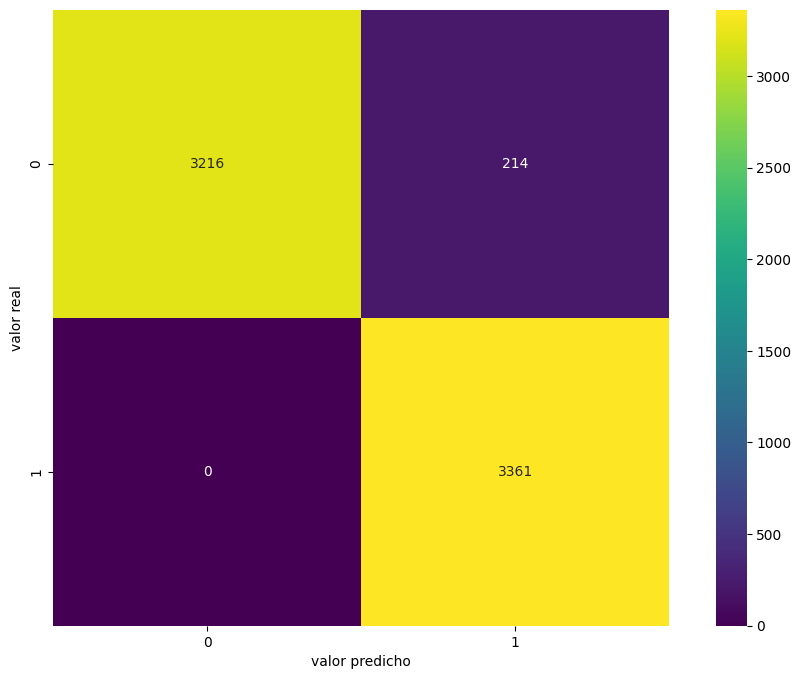

In [102]:
matriz_knn = matriz_confusion(y_test, y_pred_knn_test, y_test.shape[0])
matriz_knn

In [103]:
results_knn = metricas(y_test, y_pred_knn_test, y_train, y_pred_knn_train, "KNN2")
df_all_results = pd.concat([df_all_results, results_knn])
df_all_results

accuracy  precision    recall        f1    kapppa    set  \
0  0.690325   0.678288  0.711990  0.694731  0.380896   test   
1  0.692633   0.683968  0.719080  0.701085  0.385182  train   
0  0.753939   0.724615  0.811068  0.765408  0.508417   test   
1  0.773479   0.747792  0.827042  0.785423  0.546832  train   
0  0.806067   0.768523  0.870277  0.816241  0.612610   test   
1  0.822810   0.787774  0.884915  0.833524  0.645507  train   
0  0.968488   0.940140  1.000000  0.969146  0.937009   test   
1  1.000000   1.000000  1.000000  1.000000  1.000000  train   

                modelo  
0  Regresión logistica  
1  Regresión logistica  
0    Decission Tree II  
1    Decission Tree II  
0        Random Forest  
1        Random Forest  
0                 KNN2  
1                 KNN2

## Gradient Boosting 

In [107]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param = {"max_depth": depth,
         "min_samples_split": [50, 100, 150, 200, 250],
         "max_features": [1,2,3,4], 
         "min_samples_leaf": [50, 100, 150, 200, 250]}

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = GradientBoostingClassifier(),
        param_grid = param,
        n_jobs     = -1,
        verbose    = 1,
        cv         = 10, 
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

Fitting 10 folds for each of 3000 candidates, totalling 30000 fits


KeyboardInterrupt: 

Aquí mi ordenador peta, después de 4 horas seguía pensando 🫠 Seguiré intentándolo pero actualizo entrega por haber avanzado más. Hasta aquí mi mejor modelo es el Random Forest, mi KNN está overfiteado 🫣